# Binary ESN

Here I present my idea for a binary approach to the reservoir computing. I will study the dynamics of a reservoir constituted of binary *neurons* $x_i \in \{ -1, +1 \}$ for $ i = 1,2,...,N $ and binary *weights* $w_{ij} \in \{ -1, 0, +1 \}$  for $ i,j = 1,2,...,N$ (the zero value accounts for the fact that two neurons may not be linked).

The network evolve using the obvious rule

$$
x_i[n+1] = sgn ( S_i[n] )
$$

where $n$ is a (discrete) time index and:

$$
S_i[n] := \sum_i^N w_{ij}x_j[n]
$$

## Constructing the reservoir

We can think of a reservoir as a *directed weighted graph*, complitely defined by its weights matrix $w_{ij}$. In order to construct it, we use an and Erdos-Renyi procedure: each link $w_{ij}$ is created with probability $p$ or stays 0 with probability $1-p$. If it is created, its value is set to be 1 with probability $\alpha$  or -1 with probability $1 -\alpha$. Anyway, we will not use this parameters directly. Our network will instead be constructed using 3 parameters:

* N = The **number of neurons** $x_i$ in the network
* k = p/N = the **_mean_ degree** of the network ( $\in[0. ,N]$ )
* d = 1/2 - $\alpha$ = the **asymmetry** in the weights value ($\in[-0.5,0.5]$)  

which are obviously realated to $p$ and $\alpha$. This is done because these parameters are easier to understand.

The neurons initial condition $x_0$ is randomly generated according to a parameter $c$, representing the probability of a neuron to have a positive value (so that $1-c$ represent the proability of being negative).


## Theoretical aspects 

Defining $y_{ij} := w_{ij}x_j$ (time dependency is omitted) we have that its mean and variance are
$$
\hat{y} = d \hat{x}
\qquad
\hat{\sigma}^2_{y} = 1 - (d \hat{x})^2
$$
where $d$ is the asymmetry coefficient introduced above and $\hat{x}$ is the mean value of the neurons states.
So, studying $S_i$ we note that each neuron will have, on average, k incoming connection. Each one of these connection will be with one of the $y_{ij}$, so that we can study the mean $S$ considering:

$$
\hat{S} := \frac{1}{N}\sum_i^N S_i = \frac{1}{N}\sum_i^N \sum_i^N w_{ij}x_j \approx kd\hat{x}
$$

and its variance

$$
\hat{\sigma}^2_{S} = k (1 - (d \hat{x})^2)
$$

Note that this is only the variance of the states $S_i$ of a single realization of a net. Our goal would be to study the variance of the $x_i$ for a general number T of timestep and as an average on many realization of a network.

**still working on this theoretical issues**

## Network dynamics

To understand how the network evolves we carry some simulation. To analyze them, it is usefull to define:

*  **Energy** $E[n]  := \frac{1}{N}\sum_i^N x_i[n]$ (i.e. the mean value of the x)
* **Activity** $ A[n] := D(X[n],X[n-1])$ (i.e. the number of neurons that changed their state in the last step)

Here D(a,b) is the Hamming distance and $X =(x_1,x_2,...,x_N) $.


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run bESN.py


In [3]:
%run functions_bESN.py

## Perturbations
To study how the sistem is sensible to the initial conditions, we first generate an initial condition $X_{or}$ and let the system evolve from that for $T$ timesteps. We then change one random state in $X_{or}$ and use this *pertubed* initial condition, calculating the hamming distance betwen this trajectory and the original one, for every time step. We do this for nPer different perturbation of $X_{or}$.


Each graph shows the average hamming distance of the pertubed trajectories from the original one, the mean energy of all the perturbed trajectory, their mean activity and their mean entropy.

0.0


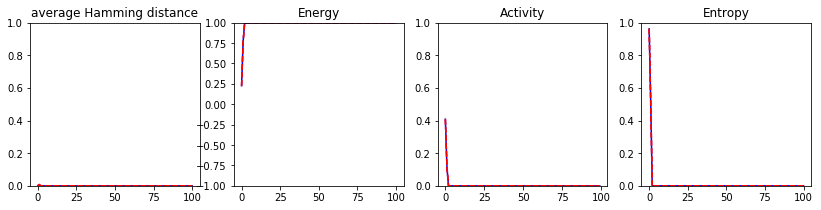

4.88888888889


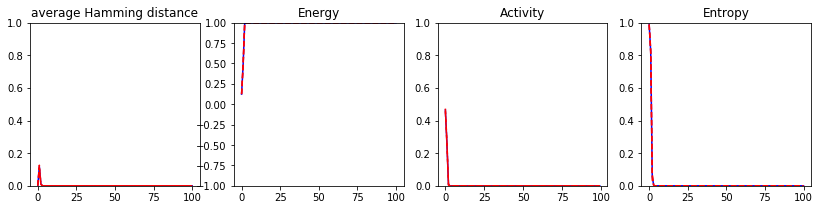

9.77777777778


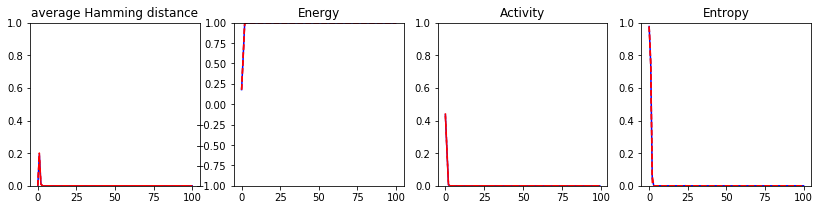

14.6666666667


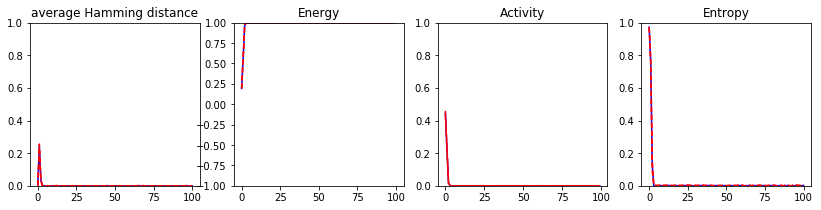

19.5555555556


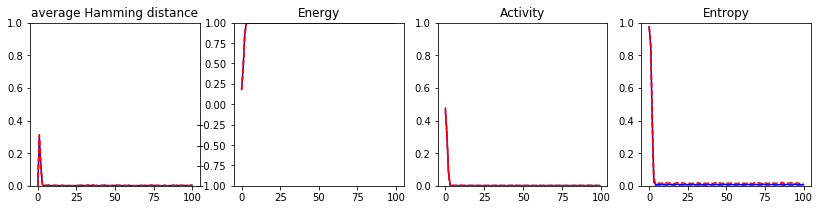

24.4444444444


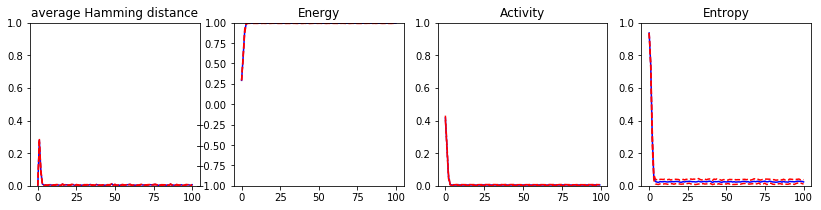

29.3333333333


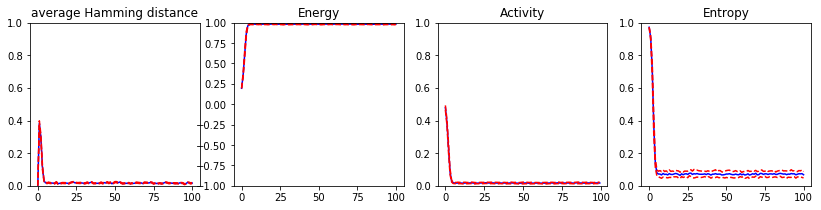

34.2222222222


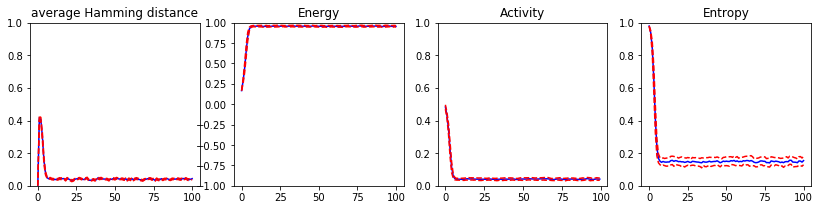

39.1111111111


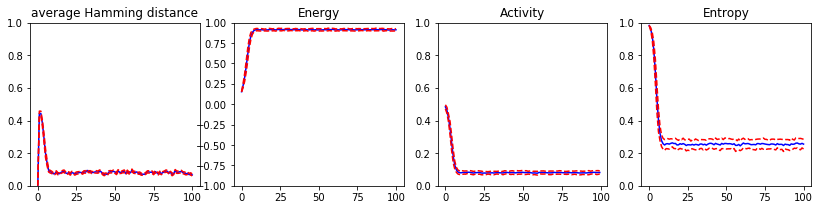

44.0


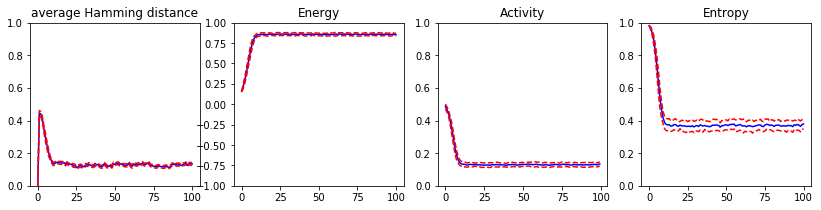

In [12]:
for noise in np.linspace(0,0.2,10):
    
    
    
    N = 1000
    k = 220   
    T = 100
    d = 0.18
    nPer = 50
    
    print noise * k
    
    simulate_perturbation(N = N, d=d, k = k,T= T, nPer = nPer, c = 0.6, noise = noise )
    

0.0


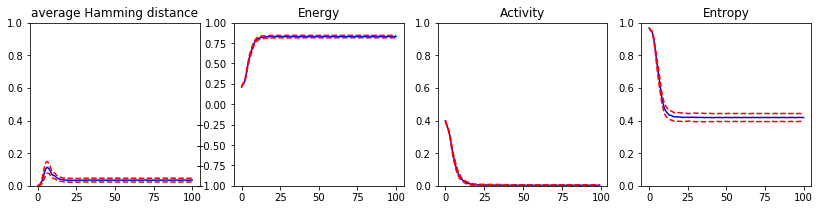

0.488888888889


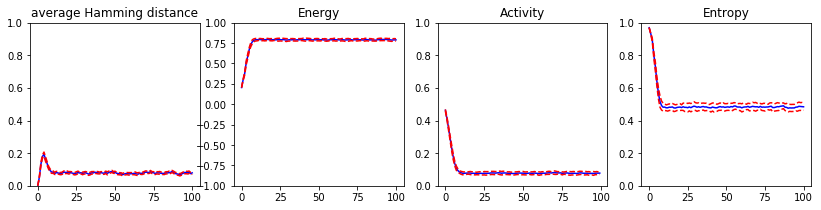

0.977777777778


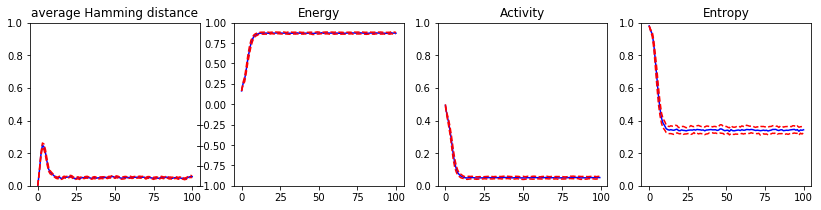

1.46666666667


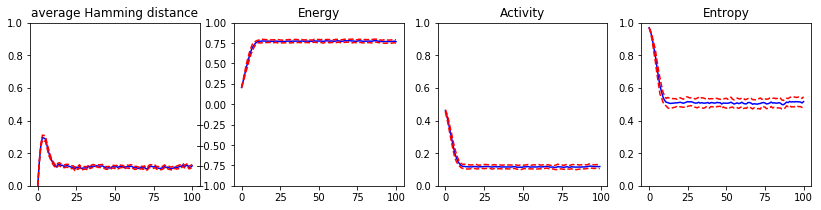

1.95555555556


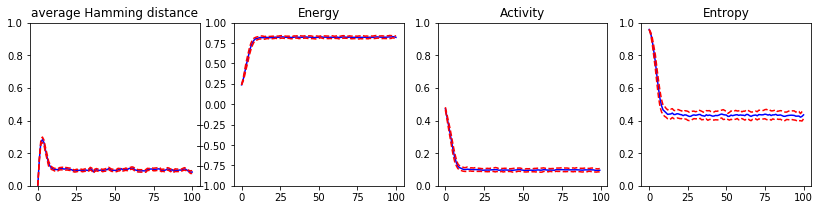

2.44444444444


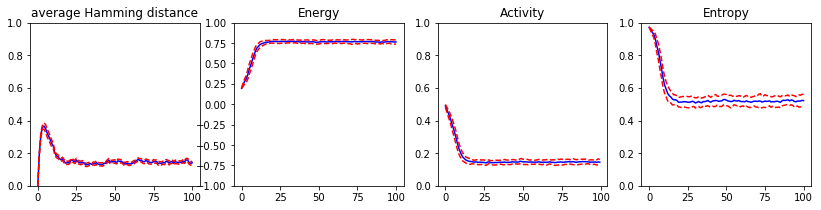

2.93333333333


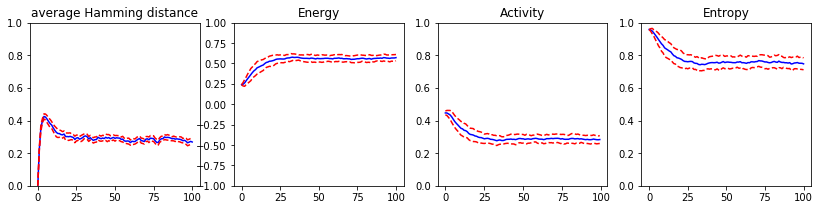

3.42222222222


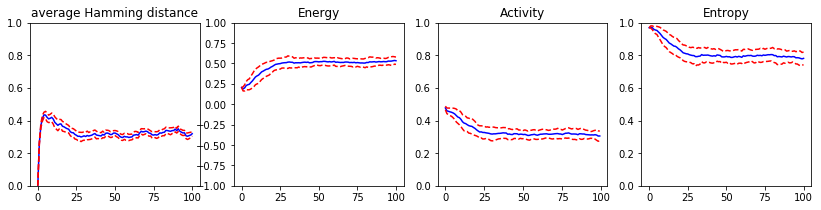

3.91111111111


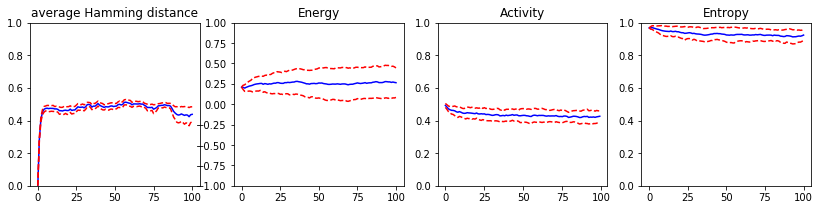

4.4


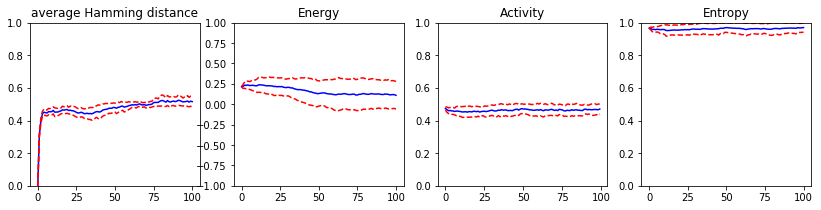

In [103]:
for noise in np.linspace(0,0.2,10):
    
    N = 1000
    k = 22   
    T = 100
    d = 0.18
    nPer = 50
    
    print noise * k
    
    simulate_perturbation(N = N, d=d, k = k,T= T, nPer = nPer, c = 0.6, noise = noise )

In [56]:
for d in np.linspace(0,0.25,20):
    
    print d
    
    N = 1000
    k = 22   
    signal = 2* np.random.random_sample(300) - 1 

    nPer = 50
    
    simulate_perturbation_signal(N = N, d=d, k = k, signal = signal, noise = noise , nPer = nPer, c = 0.6)

0.0


NameError: global name 'noise' is not defined

In [ ]:
for d in np.linspace(0,0.25,20):
    
    print d
    
    N = 1000
    k = 22   
    signal = np.array([ sin(0.5*x) for x in range(300)])

    nPer = 50
    
    simulate_perturbation_signal(N = N, d=d, k = k, signal = signal , nPer = nPer, c = 0.6)

In [104]:
k_val2 = np.linspace(0.1, 200, 40)
d_val2 = np.linspace(0.0, 0.5, 30)
Var2 = np.array([[ np.mean( simulate(1000, k, d, 300, c = 0.5).entropy()[100:] ) for k in k_val2] for d in tqdm(d_val2)  ])
        


100%|██████████| 30/30 [33:52<00:00, 67.76s/it]


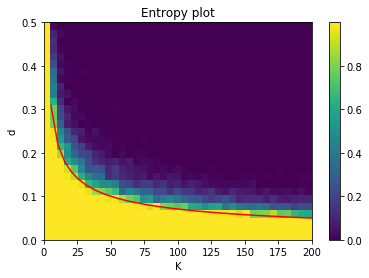

In [105]:
x = k_val2[:]
y = d_val2[:]
z = Var2[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("d")
plt.title("Entropy plot")
plt.colorbar()

plt.plot(x[1:], 1/sqrt(2*x[1:]), 'r')

In [62]:
k_val3 = np.linspace(0.1, 500, 50)
d_val3 = np.linspace(-0.5, 0.5, 50)
Var3 = np.array([[ np.mean( simulate(1000, k, d, T=300, c = 0.5, noise = 0.1).entropy()[100:] ) for k in k_val3] for d in tqdm(d_val3)  ])
        

    

100%|██████████| 50/50 [1:12:57<00:00, 87.55s/it]


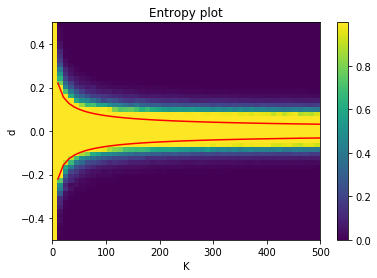

In [98]:
x = k_val3[:]
y = d_val3[:]
z = Var3[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("d")
plt.title("Entropy plot")
plt.colorbar()


plt.plot(x[1:], 1/sqrt(2*x[1:]), 'r')
plt.plot(x[1:], -1/sqrt(2*x[1:]), 'r')

In [4]:
k_val3 = np.linspace(0.1, 300, 100)
d_val3 = np.linspace(-0.5, 0.5, 100)
Var3 = np.array([[ np.mean( simulate(1000, k, d, T=300, c = 0.5, noise = 0.01).entropy()[100:] ) for k in k_val3] for d in tqdm(d_val3)  ])
        

    

100%|██████████| 100/100 [4:04:23<00:00, 146.63s/it] 


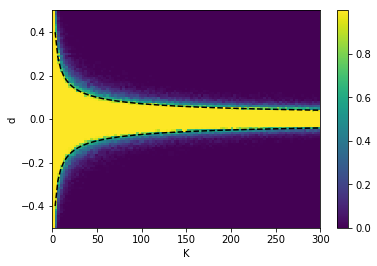

In [6]:
x = k_val3[:]
y = d_val3[:]
z = Var3[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("d")
#plt.title("Entropy plot")
plt.colorbar()


plt.plot(x[1:], 1/sqrt(2*x[1:]), 'k--')
plt.plot(x[1:], -1/sqrt(2*x[1:]), 'k--')

100%|██████████| 100/100 [5:02:58<00:00, 181.79s/it] 


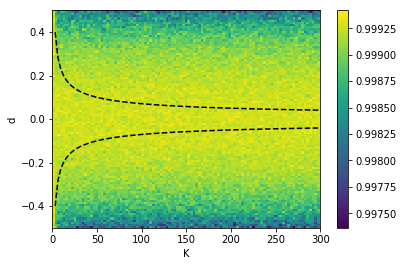

In [9]:
k_val4 = np.linspace(0.1, 300, 100)
d_val4 = np.linspace(-0.5, 0.5, 100)
Var4 = np.array([[ np.mean( simulate(1000, k, d, T=300, c = 0.5, noise = 1).entropy()[100:] ) for k in k_val3] for d in tqdm(d_val3)  ])


x = k_val4[:]
y = d_val4[:]
z = Var4[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("d")
#plt.title("Entropy plot")
plt.colorbar()


plt.plot(x[1:], 1/sqrt(2*x[1:]), 'k--')
plt.plot(x[1:], -1/sqrt(2*x[1:]), 'k--')

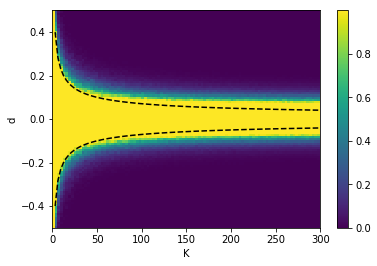

In [8]:
x = k_val4[:]
y = d_val4[:]
z = Var4[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("d")
#plt.title("Entropy plot")
plt.colorbar()


plt.plot(x[1:], 1/sqrt(2*x[1:]), 'k--')
plt.plot(x[1:], -1/sqrt(2*x[1:]), 'k--')

In [106]:
signal = 2* np.random.random_sample(300) - 1 

k_val2 = np.linspace(0.1, 200, 40)
d_val2 = np.linspace(0.0, 0.5, 30)
Var2 = np.array([[ np.mean( simulate(N=1000, k=k, d=d, noise = 0, signal=signal, c = 0.5).entropy()[100:] ) for k in k_val2] for d in tqdm(d_val2)  ])
        


100%|██████████| 30/30 [23:38<00:00, 47.29s/it]


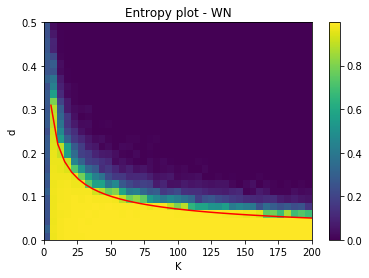

In [107]:
x = k_val2[:]
y = d_val2[:]
z = Var2[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("d")
plt.title("Entropy plot - WN")
plt.colorbar()

plt.plot(x[1:], 1/sqrt(2*x[1:]), 'r')

In [108]:
signal = np.array([ sin(0.5*x) for x in range(300)])

k_val2 = np.linspace(0.1, 200, 40)
d_val2 = np.linspace(0.0, 0.5, 30)
Var2 = np.array([[ np.mean( simulate(1000, k, d, signal=signal, c = 0.5).entropy()[100:] ) for k in k_val2] for d in tqdm(d_val2)  ])
        


100%|██████████| 30/30 [24:06<00:00, 48.21s/it]


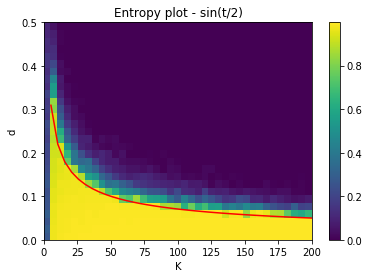

In [109]:
x = k_val2[:]
y = d_val2[:]
z = Var2[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("d")
plt.title("Entropy plot - sin(t/2)")
plt.colorbar()

plt.plot(x[1:], 1/sqrt(2*x[1:]), 'r')

In [6]:
signal = np.array([ sin(0.5*x) +sin(x*3/19) for x in range(300)])

k_val2 = np.linspace(0.1, 200, 40)
d_val2 = np.linspace(0.0, 0.5, 30)
Var2 = np.array([[ np.mean( simulate(1000, k, d, signal=k*signal, c = 0.5).entropy()[100:] ) for k in k_val2] for d in tqdm(d_val2)  ])
        


100%|██████████| 30/30 [1:07:50<00:00, 135.69s/it]


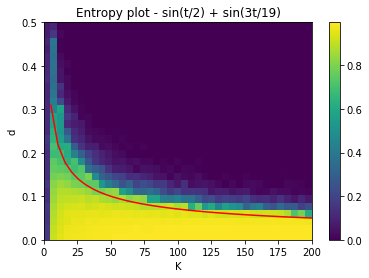

In [111]:

x = k_val2[:]
y = d_val2[:]
z = Var2[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("d")
plt.title("Entropy plot - sin(t/2) + sin(3t/19)")
plt.colorbar()

plt.plot(x[1:], 1/sqrt(2*x[1:]), 'r')

In [116]:
signal = np.array([ sin(0.5*x) +sin(x*3/19) for x in range(300)])

k_val2 = np.linspace(0.1, 200, 40)
d_val2 = np.linspace(0.0, 0.5, 30)
Var2 = np.array([[ np.mean( simulate(1000, k, d, signal=signal*k/4, c = 0.5).entropy()[100:] ) for k in k_val2] for d in tqdm(d_val2)  ])
        

100%|██████████| 30/30 [24:11<00:00, 48.39s/it]


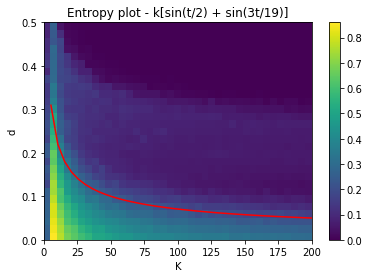

In [117]:
x = k_val2[:]
y = d_val2[:]
z = Var2[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("d")
plt.title("Entropy plot - k[sin(t/2) + sin(3t/19)]")
plt.colorbar()

plt.plot(x[1:], 1/sqrt(2*x[1:]), 'r')

## DELTAS



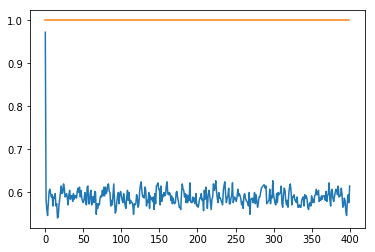

In [99]:
A = 5.

signal = np.zeros(400)
for s in range(len(signal)):
    if np.random.rand()<1:
        signal[s] = A

#signal = np.array([ A*sin(x/4.) for x in range(300)])
E = simulate(1000, k=22, d=0., signal=signal, c = 0.6).entropy()[:]

plt.show()
plot(E)
plot(np.abs(signal[:]/A))
plt.show()

In [100]:
def make_delta(l):
    signal = np.zeros(300)
    for s in range(len(signal)):
        if np.random.rand()<l:
            signal[s] = 2.
    return signal


k_val2 = np.linspace(0.1, 200, 20)
l_val2= np.linspace(0.001, 1, 10)


Var2 = np.array([[ np.mean( simulate(1000, k=k, d=0, signal=make_delta(l), c = 0.5).entropy()[100:] ) for k in k_val2] for l in tqdm(l_val2)  ])

100%|██████████| 10/10 [04:31<00:00, 27.17s/it]


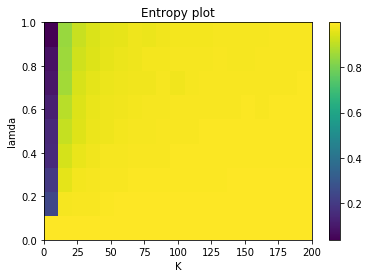

In [101]:
x = k_val2[:]
y = l_val2[:]
z = Var2[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("lamda")
plt.title("Entropy plot")
plt.colorbar()

#plt.plot(x[1:], 1/sqrt(2*x[1:]), 'r')

In [ ]:
def make_delta(l):
    signal = np.zeros(300)
    for s in range(len(signal)):
        if np.random.rand()<l:
            signal[s] = 10.
    return signal


k_val2 = np.linspace(0.1, 100, 20)
l_val2= np.linspace(0.001, 1, 20)


Var2 = np.array([[ np.mean( simulate(1000, k=k, d=0, signal=make_delta(l), c = 0.5).entropy()[100:] ) for k in k_val2] for l in tqdm(l_val2)  ])

In [ ]:
x = k_val2[:]
y = l_val2[:]
z = Var2[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("lamda")
plt.title("Entropy plot")
plt.colorbar()

#plt.plot(x[1:], 1/sqrt(2*x[1:]), 'r')

In [44]:
P = bESN(N=1000, d = 0.18, k = 22)
P.evolve()

In [55]:
a,b = P.find_communities(threshold=20)
print len(a), len(b)

380 620


11

In [119]:
k_val2 = np.linspace(0.1, 300, 100)
d_val2 = np.linspace(-0.5, 0.5, 100)
Var2 = np.array([[ np.mean( simulate(1000, k, d, 300, c = 0.5).entropy()[100:] ) for k in k_val2] for d in tqdm(d_val2)  ])

100%|██████████| 100/100 [4:46:02<00:00, 171.62s/it] 


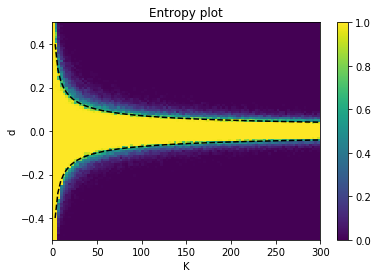

In [125]:
x = k_val2[:]
y = d_val2[:]
z = Var2[:,:]
plt.pcolor(x,y,z)
plt.xlabel("K")
plt.ylabel("d")
plt.title("Entropy plot")
plt.colorbar()

plt.plot(x[1:], 1/sqrt(2*x[1:]), 'k--')
plt.plot(x[1:], -1/sqrt(2*x[1:]), 'k--')

In [17]:
import scipy, scipy.stats
x = scipy.linspace(-40,40,81)
pmf = scipy.stats.norm.pdf(x, 0, 10)


plt.plot(x,pmf)

plt.axvline(x=0., "k")

plt.axvline(x=1000)

plt.xticks([])
plt.yticks([])

SyntaxError: non-keyword arg after keyword arg (<ipython-input-17-053daf06db11>, line 8)

In [ ]:
n_val5 = np.linspace(0, 1.1, 100)
d_val5 = np.linspace(-0.5, 0.5, 100)
Var5 = np.array([[ np.mean( simulate(1000, k=50, d=d, T=300, c = 0.5, noise = n).entropy()[100:] ) for n in n_val5] for d in tqdm(d_val5)  ])


x = k_val5[:]
y = d_val5[:]
z = Var5[:,:]
plt.pcolor(x,y,z)
plt.xlabel("noise")
plt.ylabel("d")
#plt.title("Entropy plot")
plt.colorbar()


#plt.plot(x[1:], 1/sqrt(2*x[1:]), 'k--')
#plt.plot(x[1:], -1/sqrt(2*x[1:]), 'k--')

 18%|█▊        | 18/100 [49:50<3:47:03, 166.13s/it]